In [7]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import iqr

In [16]:
train_df = pd.read_parquet("train.parquet")
train_target = pd.read_csv("train_target.csv")

test_df = pd.read_parquet("test.parquet")
test_submit_example = pd.read_csv("test_submit_example.csv")

In [18]:
import scipy
sub_vec_train = train_df.milleage_all > train_df.milleage_all.quantile(0.75) + 1.5 * scipy.stats.iqr(train_df.milleage_all, nan_policy="omit")
sub_vec_test = test_df.milleage_all > test_df.milleage_all.quantile(0.75) + 1.5 * scipy.stats.iqr(test_df.milleage_all, nan_policy="omit")

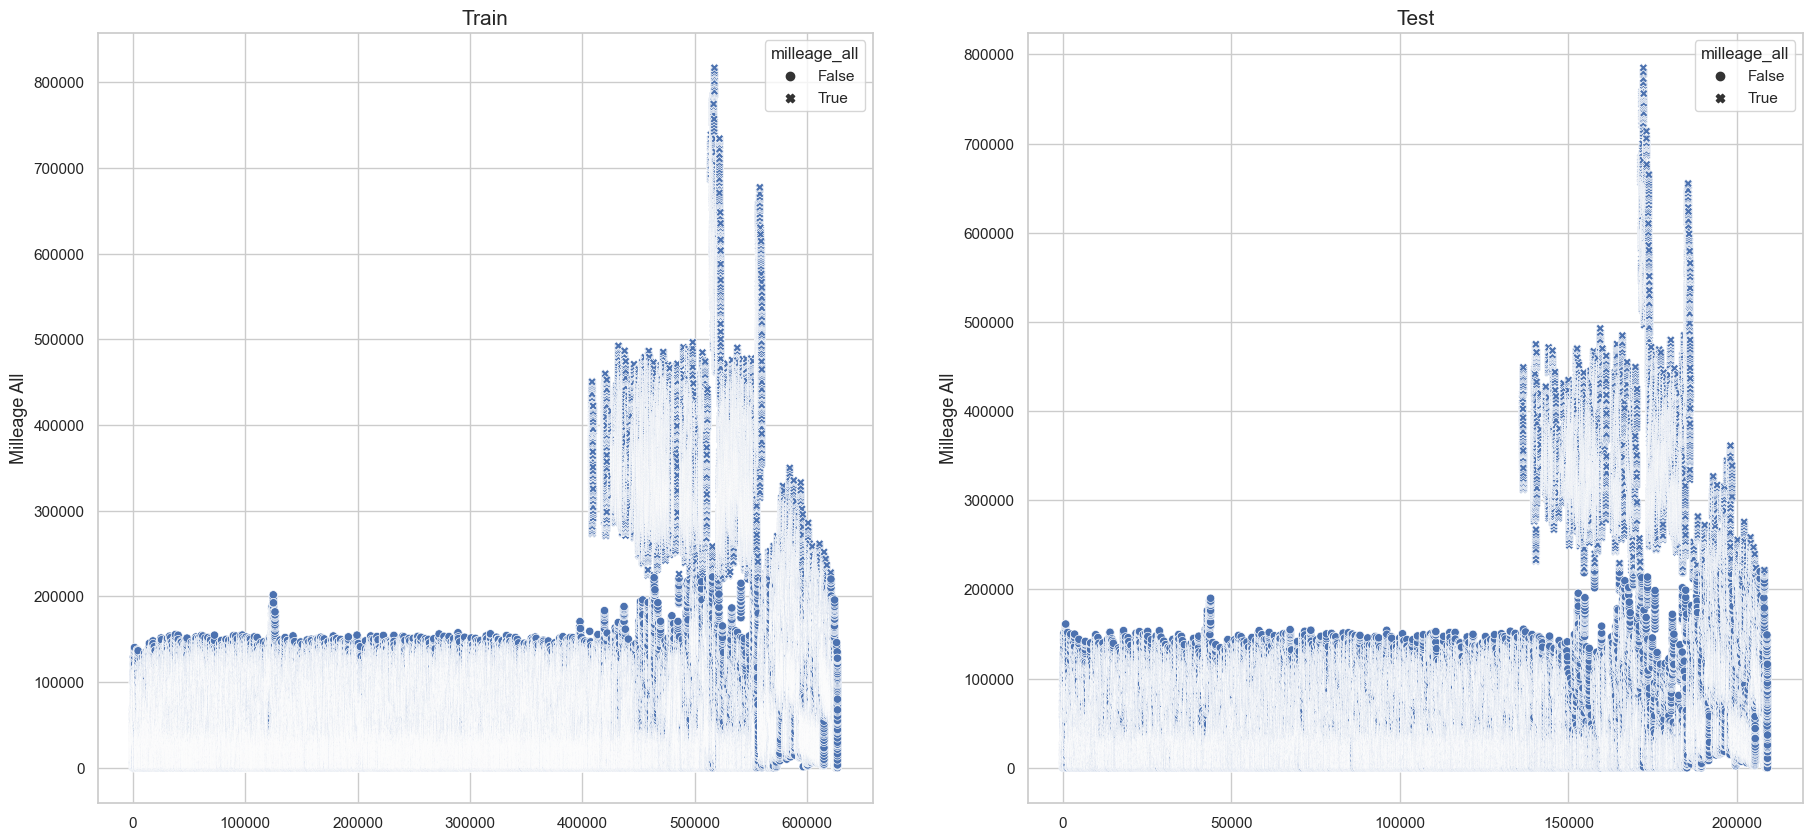

In [19]:
sns.set(rc={'figure.figsize':(22, 10)})
sns.set_style('whitegrid')

fig, ax = plt.subplots(1,2)

train_plot = sns.scatterplot(list(range(train_df['milleage_all'].shape[0])), 
                             train_df['milleage_all'], ax=ax[0], style=sub_vec_train)
train_plot.set_title("Train", fontsize=15);
train_plot.set_ylabel("Milleage All", fontsize=13)

test_plot = sns.scatterplot(list(range(test_df['milleage_all'].shape[0])), 
                            test_df['milleage_all'], ax=ax[1], style=sub_vec_test)
test_plot.set_title("Test", fontsize=15);
test_plot.set_ylabel("Milleage All", fontsize=13)

fig.show();

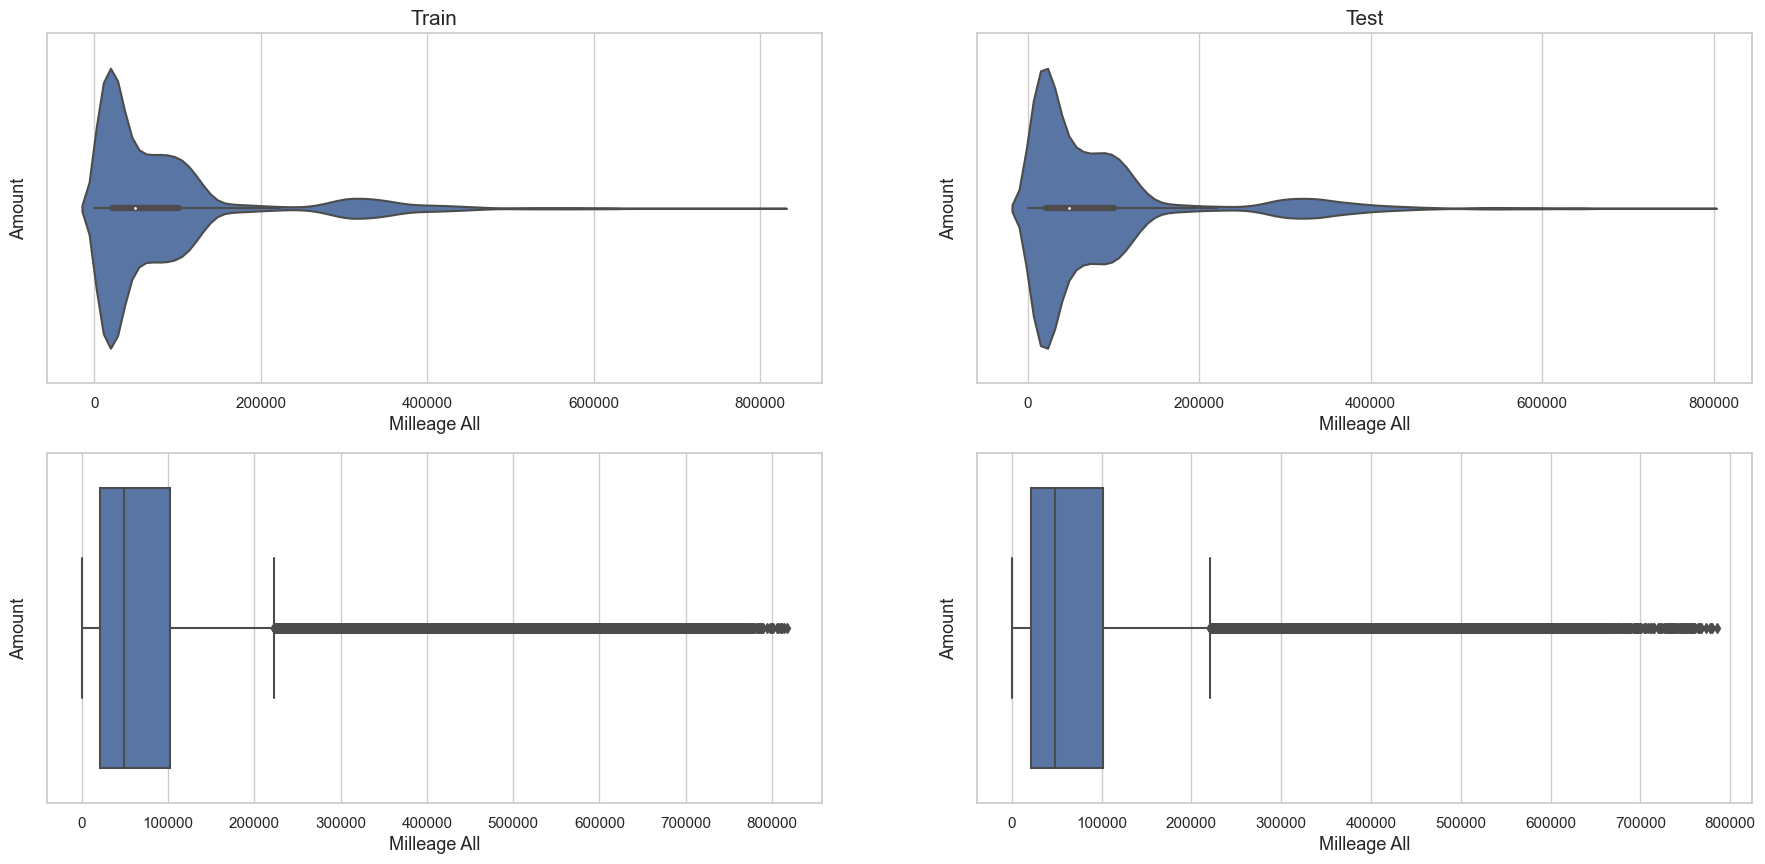

In [45]:
fig, ax = plt.subplots(2,2)

train_plot = sns.violinplot(train_df['milleage_all'], ax=ax[0][0])
train_plot.set_title("Train", fontsize=15);
train_plot.set_xlabel("Milleage All", fontsize=13)
train_plot.set_ylabel("Amount", fontsize=13)

test_plot = sns.violinplot(test_df['milleage_all'], ax=ax[0][1])
test_plot.set_title("Test", fontsize=15);
test_plot.set_xlabel("Milleage All", fontsize=13)
test_plot.set_ylabel("Amount", fontsize=13)

train_bplot = sns.boxplot(train_df['milleage_all'], ax=ax[1][0])
train_bplot.set_xlabel("Milleage All", fontsize=13)
train_bplot.set_ylabel("Amount", fontsize=13)

test_bplot = sns.boxplot(test_df['milleage_all'])
test_bplot.set_xlabel("Milleage All", fontsize=13)
test_bplot.set_ylabel("Amount", fontsize=13)

fig.show();

In [75]:
train_df.describe()

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange
count,627228.000000,627228.000000,622599.000000,626871.000000,626899.000000,626853.000000,626881.000000,626837.000000,626892.000000,626819.000000,626916.000000
mean,19013.139979,2.859324,86792.528852,29.614066,29.532448,29.623114,29.648237,29.557443,29.530999,29.630511,29.701698
std,10709.261582,1.459901,107304.496939,1.696794,1.687069,1.708883,1.704621,1.700139,1.702034,1.693864,1.710169
min,2.000000,1.000000,1.000000,25.100000,25.100000,25.100000,25.100000,25.100000,25.100000,25.100000,25.100000
25%,9733.750000,2.000000,21104.000000,28.400000,28.300000,28.400000,28.400000,28.300000,28.300000,28.400000,28.500000
50%,19174.500000,3.000000,48663.000000,29.500000,29.500000,29.500000,29.600000,29.500000,29.500000,29.600000,29.600000
75%,28270.000000,4.000000,101933.500000,30.900000,30.800000,30.900000,30.900000,30.800000,30.800000,30.900000,31.000000
max,37434.000000,11.000000,816898.000000,34.900000,34.800000,34.700000,34.900000,34.800000,34.900000,34.800000,34.800000


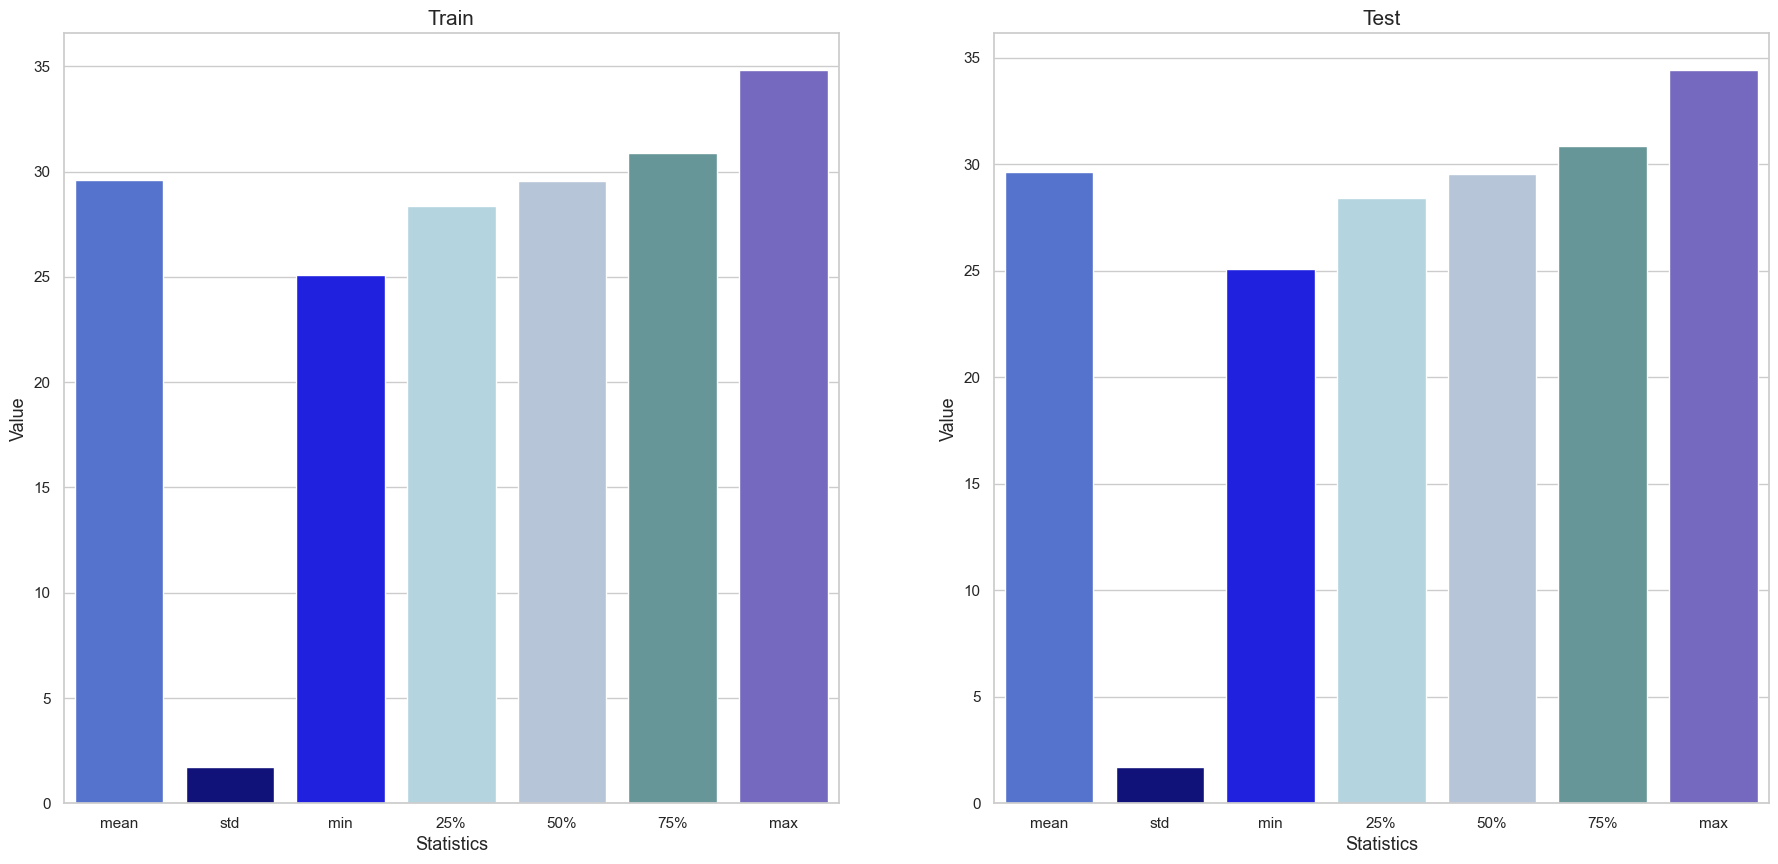

In [147]:
train_des = train_df.describe().iloc[1:]
test_des = test_df.describe().iloc[1:]
train_des.reset_index(inplace=True)
test_des.reset_index(inplace=True)
train_des['average'] = (train_des['axl1_l_w_flange'] + train_des['axl1_r_w_flange'] + train_des['axl2_l_w_flange'] + train_des['axl2_r_w_flange'] + train_des['axl3_l_w_flange'] + train_des['axl3_r_w_flange'] + train_des['axl4_l_w_flange'] + train_des['axl4_r_w_flange'])/8
test_des['average'] = (test_des['axl1_l_w_flange'] + test_des['axl1_r_w_flange'] + test_des['axl2_l_w_flange'] + test_des['axl2_r_w_flange'] + test_des['axl3_l_w_flange'] + test_des['axl3_r_w_flange'] + test_des['axl4_l_w_flange'] + test_des['axl4_r_w_flange'])/8 

palette = np.array([name+'blue' for name in ('royal', 'dark', '', 'light', 'lightsteel', 'cadet',
                                   'slate', 'dodger', 'deepsky', 'medium', 'steel')])

fig, ax = plt.subplots(1,2)

train_plot = sns.barplot(x="index", y="average", data=train_des, ax=ax[0], palette=palette)
train_plot.set_title("Train", fontsize=15);
train_plot.set_xlabel("Statistics", fontsize=13)
train_plot.set_ylabel("Value", fontsize=13)

test_plot = sns.barplot(x="index", y="average", data=test_des, ax=ax[1], palette=palette)
test_plot.set_title("Test", fontsize=15);
test_plot.set_xlabel("Statistics", fontsize=13)
test_plot.set_ylabel("Value", fontsize=13)

fig.show();

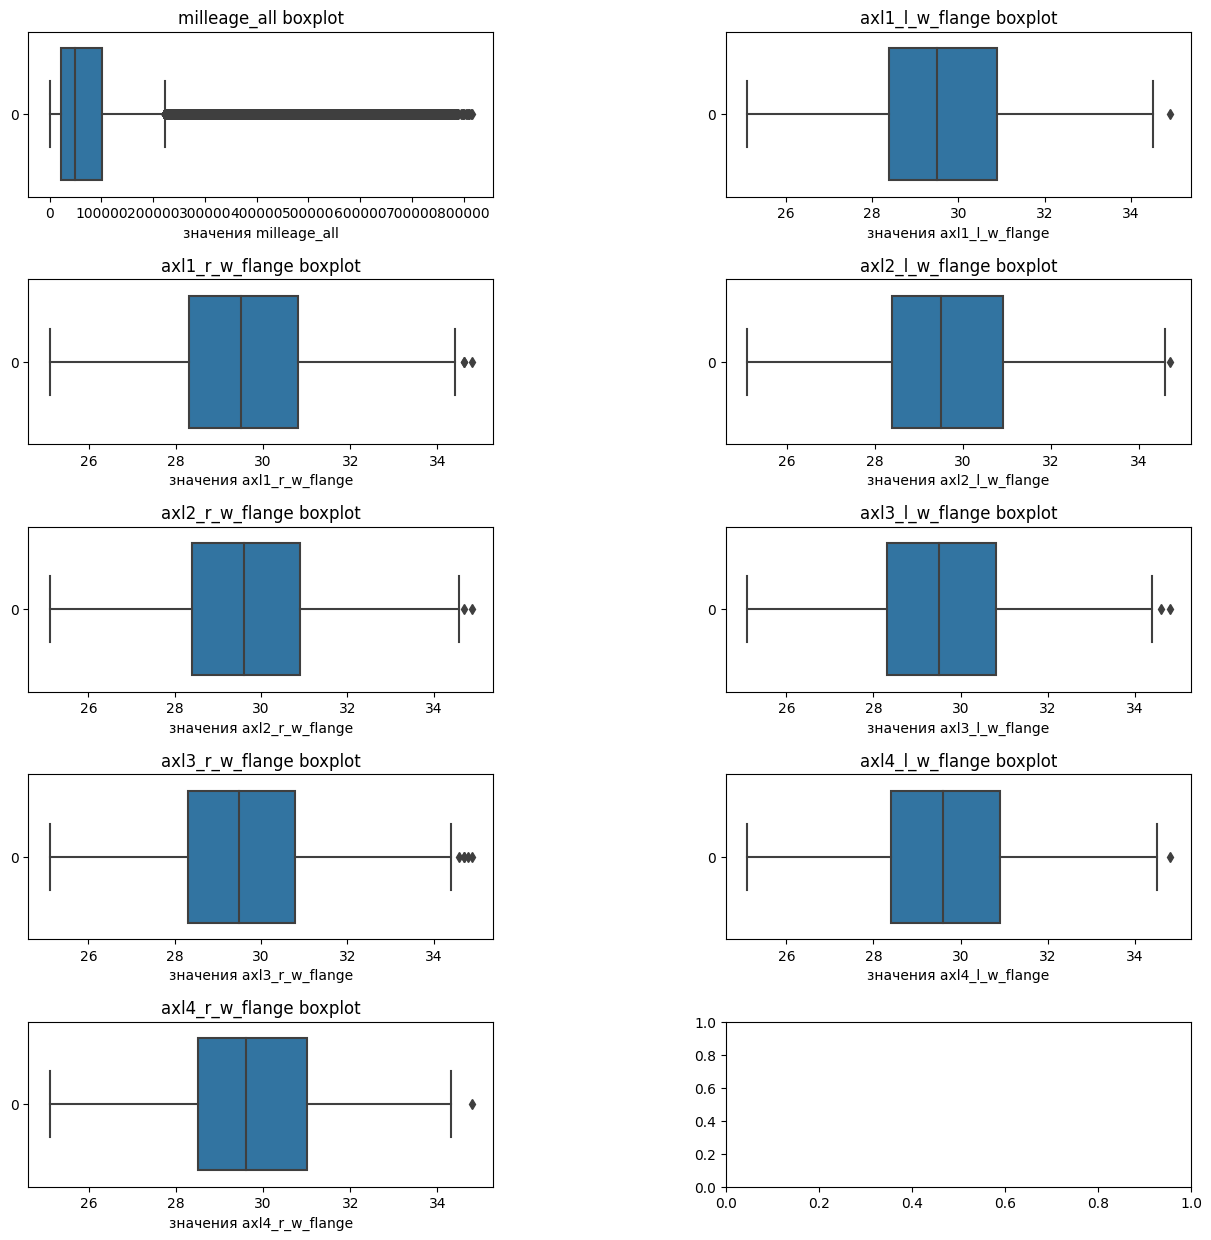

In [11]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for ax, column in zip(axs.flat, train_df.columns[2:]):
    sns.boxplot(train_df.loc[:, column], ax=ax, orient='h')
    ax.set_title(column + " boxplot")
    ax.set_xlabel("значения " + column)

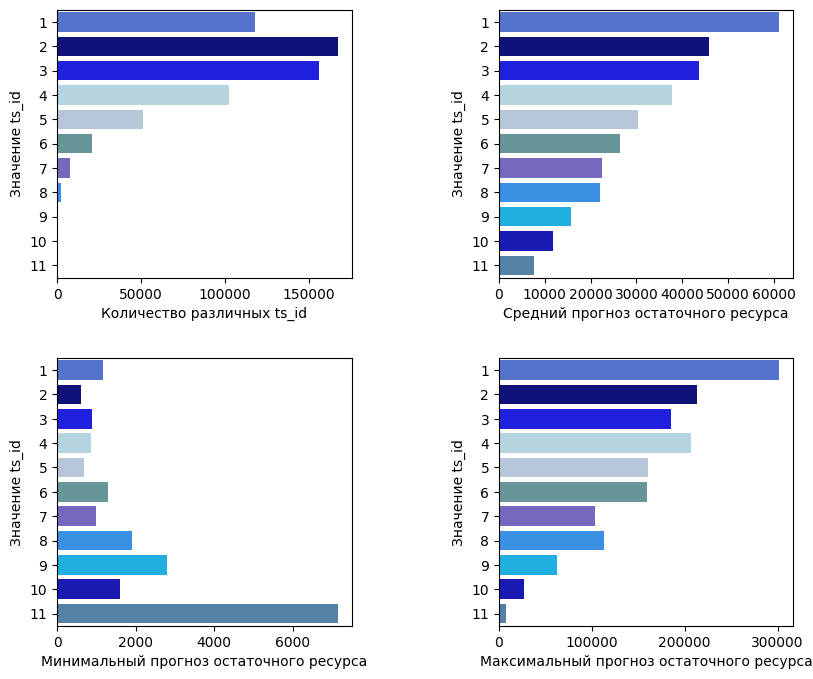

In [12]:
info_targets = pd.DataFrame({"value_counts": train_df['ts_id'].value_counts(),
                             "mean_target": train_target.groupby('ts_id').aggregate({'target': 'mean'})['target'],
                             "min_target": train_target.groupby('ts_id').aggregate({'target': 'min'})['target'],
                             "max_target": train_target.groupby('ts_id').aggregate({'target': 'max'})['target']})

alias_dict = {
    "value_counts":"Количество различных ts_id",
    "mean_target":"Средний прогноз остаточного ресурса",
    "min_target":"Минимальный прогноз остаточного ресурса",
    "max_target":"Максимальный прогноз остаточного ресурса"
    }
palette = np.array([name+'blue' for name in ('royal', 'dark', '', 'light', 'lightsteel', 'cadet',
                                   'slate', 'dodger', 'deepsky', 'medium', 'steel')])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9.5, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
for col, ax in zip(info_targets.columns, axs.flat):
    if col == "max_target":
        ax.set_xticks(ticks=np.arange(0, 300001, 100000),
                      labels=np.arange(0, 300001, 100000))
    sns.barplot(x=info_targets.loc[:, col], y=info_targets.index, orient='h', ax=ax, palette=palette)
    ax.set_xlabel(alias_dict[col])
    ax.set_ylabel("Значение ts_id")

Text(0.5, 1.0, 'Heatmap для всех фичей')

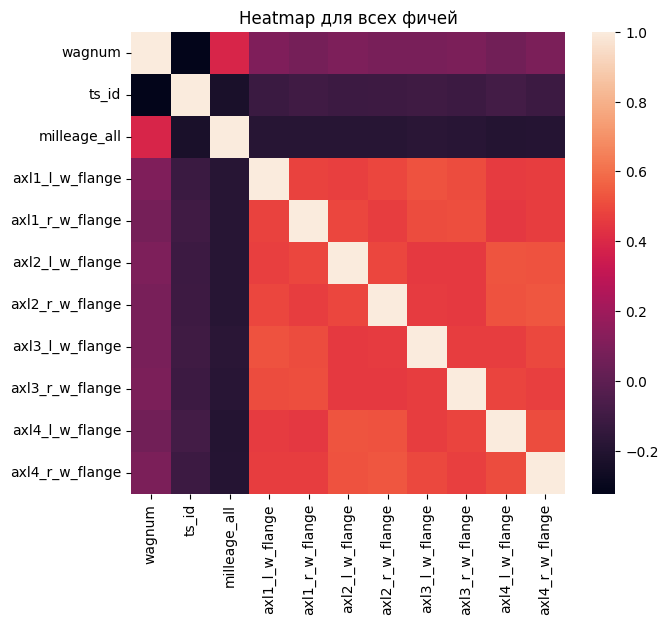

In [15]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
sns.heatmap(train_df.corr(), ax=ax)
ax.set_title("Heatmap для всех фичей")